In [1]:
# Imports
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [2]:
# Load and transform datatset
transformations = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)),
])

Image_Dataset = ImageFolder(root='/home/abdul/GitHub/Pytorch/AutoEncoders/data/train', transform=transformations)
Image_Dataset

Dataset ImageFolder
    Number of datapoints: 185
    Root location: /home/abdul/GitHub/Pytorch/AutoEncoders/data/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [3]:
img, target = Image_Dataset[0]
print(f'Target: {target}')
print(f'Image tensor shape: {img.shape}')
print(f'Number of channels: {img.shape[0]}')
print(f'Height: {img.shape[1]}')
print(f'Width: {img.shape[2]}')
print(f'First channel height dimension length: {len(img[0])}')  # This works because img[0] gives us the first channel

Target: 0
Image tensor shape: torch.Size([1, 64, 64])
Number of channels: 1
Height: 64
Width: 64
First channel height dimension length: 64


In [4]:
data_loader = DataLoader(Image_Dataset, batch_size=4, shuffle=True)

In [5]:
from model import AutoEncoder
model = AutoEncoder()

In [6]:
# model = AutoEncoder()
# print(list(model.parameters()))


In [7]:
# optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [10]:
EPOCHS = 30
for i in range(EPOCHS):
    losses = []
    for batch, (img, target) in enumerate(data_loader):
        
        #print(img.shape)

        img = img.view(-1, 1, 64, 64)

        # predictions
        predictions = model(img)
        #print(predictions.shape)


        # calculate loss
        loss = F.mse_loss(predictions, img)
        losses.append(loss.item())
        #print(loss)

        # zero gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update weights
        optimizer.step()
    
    print(f'Epoch: {i} ---- Loss: {np.mean(losses)}')


/home/abdul/miniconda3/envs/MLOps/lib/python3.10/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 0 ---- Loss: 0.08099522705170069
Epoch: 1 ---- Loss: 0.08098028802332725
Epoch: 2 ---- Loss: 0.08251491339599833
Epoch: 3 ---- Loss: 0.08046140741715406
Epoch: 4 ---- Loss: 0.07914402026762353
Epoch: 5 ---- Loss: 0.07993537399600795
Epoch: 6 ---- Loss: 0.0796025382909686
Epoch: 7 ---- Loss: 0.08025152610733788
Epoch: 8 ---- Loss: 0.07908109995595952
Epoch: 9 ---- Loss: 0.07868897350148317
Epoch: 10 ---- Loss: 0.07725912661469997
Epoch: 11 ---- Loss: 0.07858405141358046
Epoch: 12 ---- Loss: 0.07629168497279604
Epoch: 13 ---- Loss: 0.07839329302945036
Epoch: 14 ---- Loss: 0.07705722505504146
Epoch: 15 ---- Loss: 0.07821538699592681
Epoch: 16 ---- Loss: 0.08586726226705185
Epoch: 17 ---- Loss: 0.07842017450627495
Epoch: 18 ---- Loss: 0.0801624553674396
Epoch: 19 ---- Loss: 0.08207787101731655
Epoch: 20 ---- Loss: 0.07891622201559391
Epoch: 21 ---- Loss: 0.07872632550115281
Epoch: 22 ---- Loss: 0.07921252998107291
Epoch: 23 ---- Loss: 0.08016192754532428
Epoch: 24 ---- Loss: 0.07702

Original images:


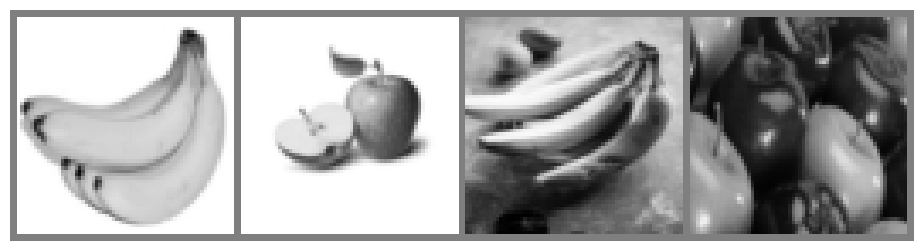

Latent space:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6397176..5.7450314].


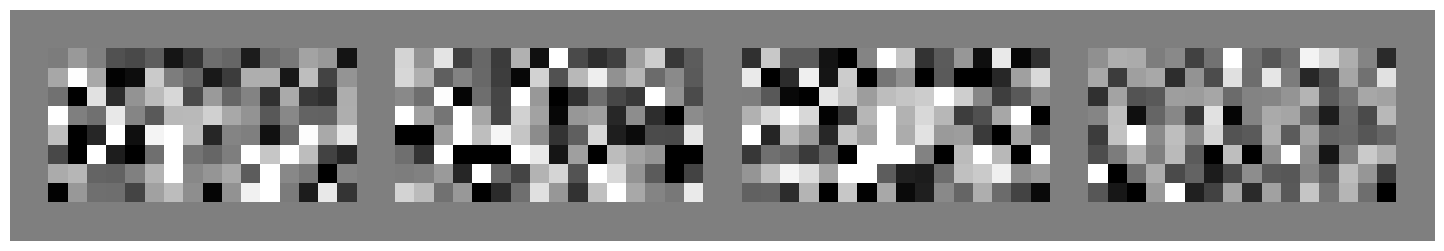

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5..1.103894].


Reconstructed images:


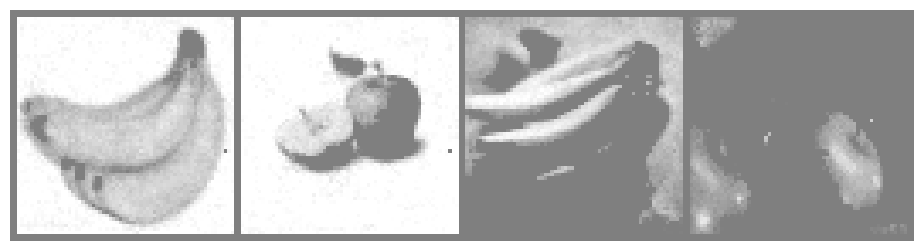

In [11]:
import matplotlib.pyplot as plt
import torchvision
import torch
import numpy as np

def show_image(img):
    img = 0.5 * (img + 1)  # denormalize
    npimg = img.cpu().detach().numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    if npimg.shape[2] == 1:  # grayscale
        npimg = npimg.squeeze(axis=2)
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(npimg)
    plt.axis('off')

# Get a batch
images, labels = next(iter(data_loader))
images = images.cpu().detach()

# 1️⃣ Original images
print('Original images:')
plt.figure(figsize=(20, 3))
show_image(torchvision.utils.make_grid(images))
plt.show()

# 2️⃣ Latent space
print('Latent space:')
latent_img = model.encoder(images)
latent_img = latent_img.view(-1, 1, 8, 16)
plt.figure(figsize=(20, 3))
show_image(torchvision.utils.make_grid(latent_img.cpu().detach()))
plt.show()

# 3️⃣ Reconstructed images
print('Reconstructed images:')
reconstructed = model(images)
plt.figure(figsize=(20, 3))
show_image(torchvision.utils.make_grid(reconstructed.cpu().detach()))
plt.show()

# 4️⃣ Compression rate
image_size = images.shape[2] * images.shape[3] * 1
